In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

/tmp/ipykernel_18136/4101786243.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-28 18:23:41.275399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 18:23:41.275632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 18:23:41.294190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable 

In [2]:
def load_dataset(csv_path):
    df = pd.read_csv(csv_path, sep=';')
    required_columns = ['Azimuth', 'Altitude', 'Timestamp']

    if not all (col in df.columns for col in required_columns):
        raise ValueError("Required columns are not present in the DataFrame.")
    

    X = df[['Azimuth', 'Timestamp']].values
    y = df[['Azimuth', 'Altitude']].values
    return X, y, df

In [3]:
csv_path = 'cleaned/cleaned_data_quartal_1_2020.csv'
X, y, df = load_dataset(csv_path)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [6]:
timesteps = 1
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

In [7]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, X_test_scaled.shape[1])))
model.add(Dense(units=2))  # Output layer dengan 2 neuron untuk Azimuth dan Altitude

model.compile(optimizer='adam', loss='mse')  # Pilih optimizer dan fungsi loss yang sesuai


2024-02-28 18:23:48.314633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 18:23:48.741868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 18:23:48.741930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 18:23:48.760173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 18:23:48.760274: I external/local_xla/xla/stream_executor

2024-02-28 18:23:49.809245: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [8]:
model.fit(X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])), y_train_scaled, epochs=50, batch_size=32)

Epoch 1/50


2024-02-28 18:23:51.677298: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7e6152ac30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 18:23:51.677341: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-02-28 18:23:51.690605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-28 18:23:51.722251: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709119431.812561   18253 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


328/328 [==============================] - 4s 7ms/step - loss: 0.0880
Epoch 2/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0403
Epoch 3/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0369
Epoch 4/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0365
Epoch 5/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0362
Epoch 6/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0353
Epoch 7/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0342
Epoch 8/50
328/328 [==============================] - 2s 7ms/step - loss: 0.0327
Epoch 9/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0308
Epoch 10/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0289
Epoch 11/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0274
Epoch 12/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0263
Epoch 13/50
328/328 [===============

In [9]:
predicted_values_scaled = model.predict(X_test_reshaped)

82/82 [==============================] - 0s 2ms/step


In [10]:
predicted_values = scaler_y.inverse_transform(predicted_values_scaled)

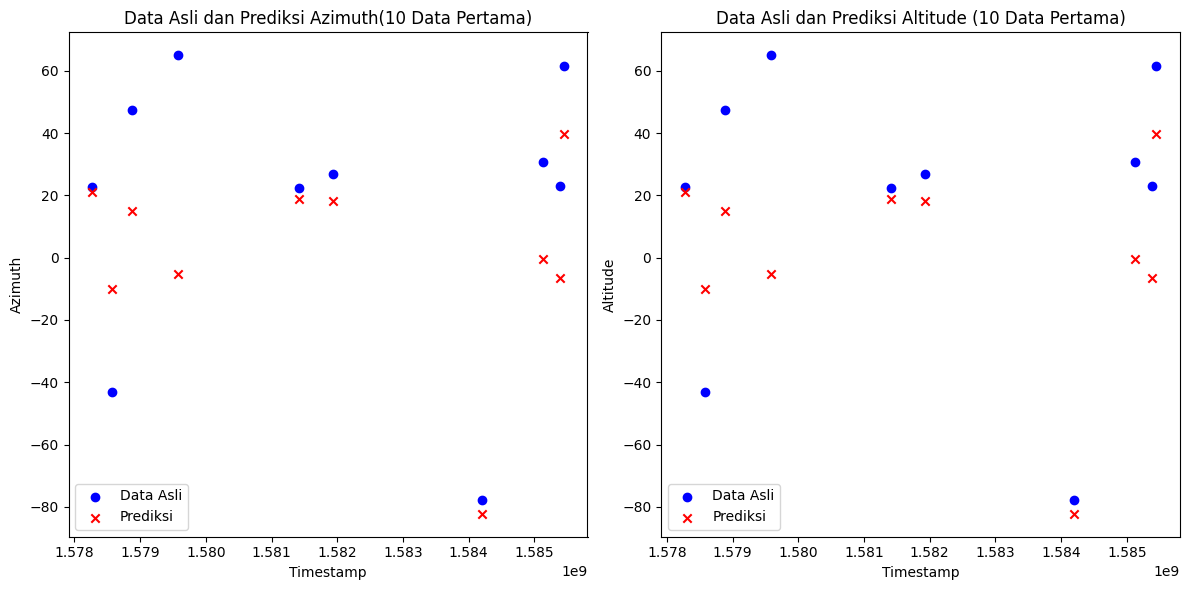

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(X_test[:10, 1], y_test[:10, 1], c='blue', label='Data Asli')
plt.scatter(X_test[:10, 1], predicted_values[:10, 1], c='red', marker='x', label='Prediksi')
plt.xlabel('Timestamp')
plt.ylabel('Azimuth')
plt.title('Data Asli dan Prediksi Azimuth(10 Data Pertama)')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[:10, 1], y_test[:10, 1], c='blue', label='Data Asli')
plt.scatter(X_test[:10, 1], predicted_values[:10, 1], c='red', marker='x', label='Prediksi')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
plt.title('Data Asli dan Prediksi Altitude (10 Data Pertama)')
plt.legend()

plt.tight_layout()
plt.show()